### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [547]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [549]:
data = pd.read_csv('~/Desktop/assignment5_1/data/coupons.csv')

In [550]:
data.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

Let's look at the data set info.

In [553]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

Data Issue 1 - The first thing to notice is the 'car' column (shown above) is missing most of the data. Let's remove that.

In [555]:
data_no_cars = data.drop(columns='car')
rows, cols = data_no_cars.shape
rows

12684

Next, let's look for other columns with missing data.

In [557]:
data_no_cars.isnull().sum().sort_values(ascending=False)

CoffeeHouse             217
Restaurant20To50        189
CarryAway               151
RestaurantLessThan20    130
Bar                     107
destination               0
income                    0
direction_opp             0
direction_same            0
toCoupon_GEQ25min         0
toCoupon_GEQ15min         0
toCoupon_GEQ5min          0
occupation                0
passanger                 0
education                 0
has_children              0
maritalStatus             0
age                       0
gender                    0
expiration                0
coupon                    0
time                      0
temperature               0
weather                   0
Y                         0
dtype: int64

What we see is most colums are complete but five have a small amount of missing values. We could handle this by either dropping the NaN values
or by filling in the missing spot. A mean or median might be a good value to fill in with. Since the data set is rather large (12683 rows) and the maximum number of rows that would need to be dropped is relatively small (794 or ~6%), I will take the approach of dropping the rows.

3. Decide what to do about your missing data -- drop, replace, other...

What we see is most colums are complete but five have a small amount of missing values. We could handle this by either dropping the 
NaN values or by filling in the missing spot. A mean or median might be a good value to fill in with. Since the data set is rather 
large (12683 rows) and the maximum number of rows that would need to be dropped is relatively small (794 or ~6%), I will take the 
approach of dropping the rows.

In [561]:
clean_data = data_no_cars.dropna()
clean_rows, clean_cols = clean_data.shape
print(f"Rows after dropping NaN: {clean_rows}")
print(f"Percentage of rows removed: {(rows - clean_rows) / rows}")

Rows after dropping NaN: 12079
Percentage of rows removed: 0.04769788710186061


Looks like we had to drop less than 5% of our data.

4. What proportion of the total observations chose to accept the coupon?



In [564]:
acceptance_rate = clean_data['Y'].mean()
print(f"Proportion of accepted coupons: {acceptance_rate}")

Proportion of accepted coupons: 0.5693352098683666


5. Use a bar plot to visualize the `coupon` column.

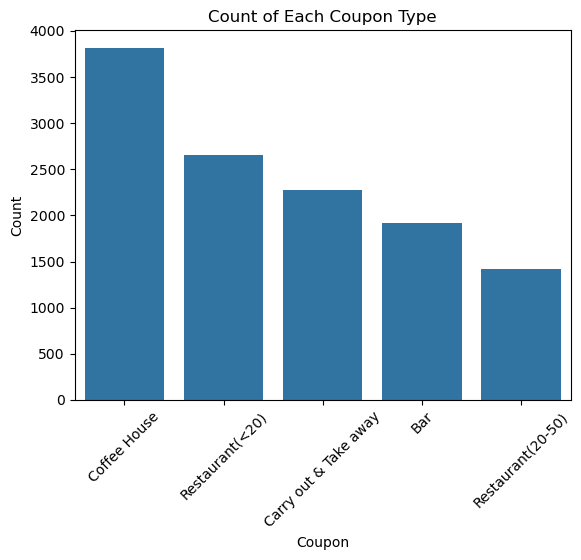

In [566]:
sns.countplot(data=clean_data, x='coupon', order=clean_data['coupon'].value_counts().index)
plt.title('Count of Each Coupon Type')
plt.xlabel('Coupon')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

6. Use a histogram to visualize the temperature column.

In [568]:
clean_data['temperature'].unique()

array([55, 80, 30], dtype=int64)

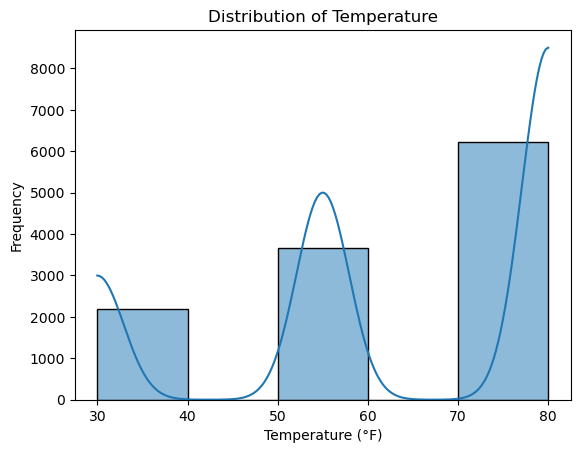

In [569]:
sns.histplot(data=clean_data, x='temperature', bins=5, kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [571]:
bar_coupons = data[data['coupon'] == 'Bar']
bar_coupons_clean = bar_coupons[bar_coupons['Bar'].notna()]
bar_coupons_clean.shape

(1996, 26)

2. What proportion of bar coupons were accepted?


In [573]:
# for col in cols:
#     print(f"Number of times people went to a bar\n")
#     print(data['Bar'].value_counts())
bar_coupons_clean['Y'].value_counts(normalize=True)

Y
0    0.589679
1    0.410321
Name: proportion, dtype: float64

Of the bar coupons, 41% were accepted.

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [576]:
bar_coupons_clean['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [577]:
low_bar_visitors = ['never', 'less1', '1~3']
high_bar_visitors = ['4~8', 'gt8']

low_group = clean_data[clean_data['Bar'].isin(low_bar_visitors)]
high_group = clean_data[clean_data['Bar'].isin(high_bar_visitors)]

low_acceptance = low_group['Y'].mean()
high_acceptance = high_group['Y'].mean()

print(f"Acceptance rate for <= 3 visits/month: {low_acceptance}")
print(f"Acceptance rate for > 3 visits/month:  {high_acceptance}")

Acceptance rate for <= 3 visits/month: 0.5626285286969527
Acceptance rate for > 3 visits/month:  0.6212889210716872


People that go to a bar more frequently accepted the coupon more frequently.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Just applying this code to 'clean_data' caused an error. In looking that up on the web, the suggestion to copy the data. That seems to work.

In [581]:
new_clean_data = clean_data.copy()

more_than_once = ['1~3', '4~8', 'gt8']
age_mapping = {
    'below21': 20,
    '21': 21,
    '26': 26,
    '31': 31,
    '36': 36,
    '41': 41,
    '46': 46,
    '50plus': 50
}
new_clean_data.loc[:, 'age_num'] = new_clean_data['age'].map(age_mapping)
over_25_and_bar_more_than_once = (new_clean_data['Bar'].isin(more_than_once)) & (new_clean_data['age_num'] > 25)

group_1 = new_clean_data[over_25_and_bar_more_than_once]
# Note that ~ (not) gives us the opposite expression
group_2 = new_clean_data[~over_25_and_bar_more_than_once]

mean_1 = group_1['Y'].mean()
mean_2 = group_2['Y'].mean()

print(f"Group 1 (Bar > 1/month & Age > 25) acceptance rate: {mean_1}")
print(f"Group 2 (All others) acceptance rate:              {mean_2}")

Group 1 (Bar > 1/month & Age > 25) acceptance rate: 0.6230366492146597
Group 2 (All others) acceptance rate:              0.554066985645933


Drivers who are over 25 and go to a bar more than once a month are more likely to accept a coupon.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [584]:
clean_data['occupation'].unique()

array(['Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Unemployed', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Office & Administrative Support',
       'Construction & Extraction', 'Legal', 'Retired',
       'Community & Social Services', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [585]:
new_clean_data = clean_data.copy()

more_than_once = ['1~3', '4~8', 'gt8']
excluded_passenger = 'Kid(s)'
excluded_occupation = 'Farming Fishing & Forestry'

bar_more_than_once = (
    new_clean_data['Bar'].isin(more_than_once) &
    (new_clean_data['passanger'] != excluded_passenger) &
    (new_clean_data['occupation'] != excluded_occupation)
)

group_1 = new_clean_data[bar_more_than_once]
group_2 = new_clean_data[~bar_more_than_once]

mean_1 = group_1['Y'].mean()
mean_2 = group_2['Y'].mean()

print(f"Group 1 (Bar > 1/month, no kid passenger, non-farming job) acceptance rate: {mean_1}")
print(f"Group 2 (All others) acceptance rate:                                       {mean_2}")


Group 1 (Bar > 1/month, no kid passenger, non-farming job) acceptance rate: 0.625
Group 2 (All others) acceptance rate:                                       0.5460734828031459


People who visit a bar more than once, have no kids and have a non-farm job accept coupons more frequently than others.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [588]:
new_clean_data = clean_data.copy()

bar_more_than_once = ['1~3', '4~8', 'gt8']
cheap_restaurant_often = ['4~8', 'gt8']
income_under_50k = ['$25000 - $37499', '$37500 - $49999', 'Less than $12500', '$12500 - $24999']
age_mapping = {
    'below21': 20,
    '21': 21,
    '26': 26,
    '31': 31,
    '36': 36,
    '41': 41,
    '46': 46,
    '50plus': 50
}

new_clean_data.loc[:, 'age_num'] = new_clean_data['age'].map(age_mapping)

# bar more than once, no kid passengers, not widowed
expression_1 = (
    new_clean_data['Bar'].isin(bar_more_than_once) &
    (new_clean_data['passanger'] != 'Kid(s)') &
    (new_clean_data['maritalStatus'] != 'Widowed')
)

# bar more than once and under 30
expression_2 = (
    new_clean_data['Bar'].isin(bar_more_than_once) &
    (new_clean_data['age_num'] < 30)
)

# cheap restaurants frequently and less than $50k income
expression_3 = (
    new_clean_data['RestaurantLessThan20'].isin(cheap_restaurant_often) &
    (new_clean_data['income'].isin(income_under_50k))
)

# combine the expressions 1 or 2 or 3
combined_expression = expression_1 | expression_2 | expression_3

group_1 = new_clean_data[combined_expression]
group_2 = new_clean_data[~combined_expression]

mean_1 = group_1['Y'].mean()
mean_2 = group_2['Y'].mean()

print(f"Group 1 (one of the three expressions is true) acceptance rate: {mean_1}")
print(f"Group 2 (everyone else) acceptance rate:                        {mean_2}")


Group 1 (one of the three expressions is true) acceptance rate: 0.6067257349979863
Group 2 (everyone else) acceptance rate:                        0.5432307043441585


People in one of the three groups identified are more likely than the rest of the people to accept a coupon.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

If you drink at a bar more than once a month, you are more likely than other drivers to accept a coupon.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Since coffee house seems to be the most popular coupon, let's see if drivers under 25 are more likely to accept a coupon.

Compare the acceptance rate between those who went to a coffee 3 or fewer times a month to those who went more.

In [603]:
low_freq = ['never', 'less1', '1~3']
high_freq = ['4~8', 'gt8']

group_1 = clean_data[clean_data['CoffeeHouse'].isin(low_freq)]
group_2 = clean_data[clean_data['CoffeeHouse'].isin(high_freq)]

# Calculate acceptance rates
mean_1 = group_1['Y'].mean()
mean_2 = group_2['Y'].mean()

# Print the results
print(f"Group 1 (≤ 3 coffee visits/month) acceptance rate: {mean_1}")
print(f"Group 2 (> 3 coffee visits/month) acceptance rate:  {mean_2}")


Group 1 (≤ 3 coffee visits/month) acceptance rate: 0.5566655924374262
Group 2 (> 3 coffee visits/month) acceptance rate:  0.6119133574007221


People who went to coffee three or less times a month are slightly less likely to accept a coupon.

Compare the acceptance rate between drivers who go to a coffee more than once a month and are under the age of 25 to the all others. 
Is there a difference?

In [607]:
new_clean_data = clean_data.copy()

age_mapping = {
    'below21': 20,
    '21': 21,
    '26': 26,
    '31': 31,
    '36': 36,
    '41': 41,
    '46': 46,
    '50plus': 50
}
new_clean_data.loc[:, 'age_num'] = new_clean_data['age'].map(age_mapping)

coffee_more_than_once = ['1~3', '4~8', 'gt8']

expression_def = (
    new_clean_data['CoffeeHouse'].isin(coffee_more_than_once) &
    (new_clean_data['age_num'] < 25)
)

group_1 = new_clean_data[expression_def]
group_2 = new_clean_data[~expression_def]

# Step 5: Calculate acceptance rates
mean_1 = group_1['Y'].mean()
mean_2 = group_2['Y'].mean()

# Step 6: Print results
print(f"Group 1 (Coffee > 1/month & Age < 25) acceptance rate: {mean_1}")
print(f"Group 2 (All others) acceptance rate:                  {mean_2}")


Group 1 (Coffee > 1/month & Age < 25) acceptance rate: 0.6536614645858343
Group 2 (All others) acceptance rate:                  0.5558436569672525


Younger drivers (under 25) who are coffee drinkers accept coupons more than other drivers

In [610]:
new_clean_data = clean_data.copy()

age_mapping = {
    'below21': 20,
    '21': 21,
    '26': 26,
    '31': 31,
    '36': 36,
    '41': 41,
    '46': 46,
    '50plus': 50
}
new_clean_data.loc[:, 'age_num'] = new_clean_data['age'].map(age_mapping)

coffee_drinker = ['1~3', '4~8', 'gt8']
expression_def = (new_clean_data['age_num'] < 25) & (new_clean_data['CoffeeHouse'].isin(coffee_drinker))

group_1 = new_clean_data[expression_def]
group_2 = new_clean_data[~expression_def]

mean_1 = group_1['Y'].mean()
mean_2 = group_2['Y'].mean()

print(f"Acceptance rate (young coffee drinkers): {mean_1}")
print(f"Acceptance rate (other drivers):         {mean_2}")

Acceptance rate (young coffee drinkers): 0.6536614645858343
Acceptance rate (other drivers):         0.5558436569672525


Use the same process to compare the acceptance rate between drivers who go to coffee more than once a month and had passengers that were friends 
and the destination was no place urgent.

In [613]:
coffee_more_than_once = ['1~3', '4~8', 'gt8']

expression_def = (
    clean_data['CoffeeHouse'].isin(coffee_more_than_once) &
    (clean_data['passanger'] == 'Friend(s)') &
    (clean_data['destination'] == 'No Urgent Place')
)

group_1 = clean_data[expression_def]
group_2 = clean_data[~expression_def]

# Step 4: Calculate acceptance rates
mean_1 = group_1['Y'].mean()
mean_2 = group_2['Y'].mean()

# Step 5: Print results
print(f"Group 1 (Coffee > 1/mo, with friends, not urgent) acceptance rate: {mean_1}")
print(f"Group 2 (All others) acceptance rate:                              {mean_2}")


Group 1 (Coffee > 1/mo, with friends, not urgent) acceptance rate: 0.7375796178343949
Group 2 (All others) acceptance rate:                              0.5442002093443715


Wow! Drivers who frequent coffee houses more than once a month and had passengers that are friends and weren't going any place urgent are much more
likely to accept a coupon.

Compare the acceptance rates of drivers:
* are under 25, had a passenger that is a friend, and the destination was no place urgent OR
* are under 25, the weather was cold, OR
* were going the same direction as the coupon was in

In [617]:
new_clean_data = clean_data.copy()

age_convert= {
    'below21': 20, '21': 21, '26': 26, '31': 31, '36': 36,
    '41': 41, '46': 46, '50plus': 50
}
new_clean_data.loc[:, 'age_num'] = new_clean_data['age'].map(age_convert)

expression_1 = (
    (new_clean_data['age_num'] < 25) &
    (new_clean_data['passanger'] == 'Friend(s)') &
    (new_clean_data['destination'] == 'No Urgent Place')
)

expression_2 = (
    (new_clean_data['age_num'] < 25) &
    (new_clean_data['weather'] == 'Cold')
)

expression_3 = (clean_data['direction_same'] == 1)

expression_combined = expression_1 | expression_2 | expression_3

group_1 = new_clean_data[expression_combined]
group_2 = clean_data[~expression_combined]

mean_1 = group_1['Y'].mean()
mean_2 = group_2['Y'].mean()

print(f"Group 1 (meets any of the 3 conditions) acceptance rate: {mean_1}")
print(f"Group 2 (all others) acceptance rate:                    {mean_2}")


Group 1 (meets any of the 3 conditions) acceptance rate: 0.6111598013438504
Group 2 (all others) acceptance rate:                    0.5527957486136784


Somewhat surprisingly, these three conditions seem like they would make accepting a coupon for coffee more likely but the data shows it's
not that much more likely.

Generally, if you are under 25 and go to a coffee house more than once a month, you are more likely to accept a coupon.